In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#importing data
data=pd.read_csv("data.csv")
data.head()

,x1,x2,y
0,-119.366669,115.000000,1
1,-101.108045,97.777159,1
2,-130.278658,106.767654,1
3,-114.703415,101.195477,1
4,-119.366669,115.000000,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2227 entries, 0 to 2226
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      2222 non-null   float64
 1   x2      2224 non-null   float64
 2   y       2227 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 52.3 KB


In [4]:
#checking for null values 
data.isnull().sum()

x1    5
x2    3
y     0
dtype: int64

In [5]:
#shape of the data
data.shape

(2227, 3)

In [6]:
#droping the null values
new_data=data.dropna()

In [23]:
#correlation values
new_data.corr()

,x1,x2,y
x1,1.000000,0.037288,-0.120871
x2,0.037288,1.000000,-0.026735
y,-0.120871,-0.026735,1.000000


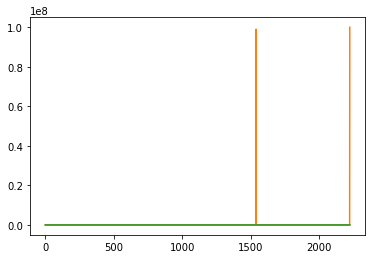

In [30]:
plt.plot(new_data)

In [7]:
#spliting the data 
X = new_data.iloc[:, [0,1]].values
y = new_data.iloc[:, 2].values

In [8]:
#splitting the data into test and training data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25)

In [10]:
#standardzing the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train))
X_test_scaled = pd.DataFrame(scaler.transform(X_test))
X_train_scaled

,0,1
0,1.399599,-0.034663
1,1.186694,-0.034662
2,-0.531752,-0.034675
3,0.512594,-0.034688
4,0.309053,-0.034705
...,...,...
1659,-1.202576,-0.034713
1660,-0.962292,-0.034720
1661,-0.940205,-0.034712
1662,0.772456,-0.034713


# MODEL IMPLIMENTATIONS

In [11]:
result_cols = ['Model Name',
              'Training Accuracy',
              'Testing Accuracy',
              'Precision',
              'Recall',
              'F1-Score']
results = []

Testing accuracy:  0.5943509615384616
Training accuracy:  0.5495495495495496
Precision:  0.5495495495495496
Recall:  0.5495495495495496
F1-Score:  0.5495495495495496


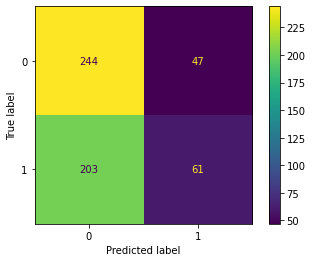

In [14]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
lr = LogisticRegression(random_state=0).fit(X_train_scaled,y_train) 
pred = lr.predict(X_test_scaled)
# Confusion matrix 
cm = metrics.ConfusionMatrixDisplay(confusion_matrix=metrics.confusion_matrix(y_test,pred,labels=lr.classes_),display_labels=lr.classes_)
# Calc metrics
train_a = lr.score(X_train_scaled,y_train)
test_a = lr.score(X_test_scaled,y_test)
prec = metrics.precision_score(y_test,pred,average='micro')
rec = metrics.recall_score(y_test,pred,average='micro')
f1 = metrics.f1_score(y_test,pred,average='micro')
# Add to results
results.append(['LogisticRegression',train_a,test_a,prec,rec,f1])
# Print metrics 
print('Testing accuracy: ', train_a)
print('Training accuracy: ', test_a)
print('Precision: ', prec)
print('Recall: ', rec)
print('F1-Score: ', f1)
# Plot confusion matrix
cm.plot()

Testing accuracy:  0.7211538461538461
Training accuracy:  0.4972972972972973
Precision:  0.4972972972972973
Recall:  0.4972972972972973
F1-Score:  0.4972972972972973


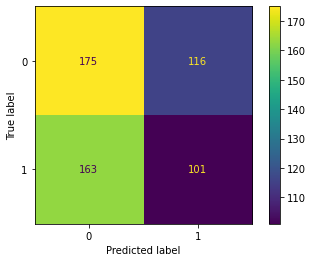

In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
# Default: n_neighbors=5 
kn = KNeighborsClassifier().fit(X_train_scaled,y_train) 
pred = kn.predict(X_test_scaled)
# Confusion matrix 
cm = metrics.ConfusionMatrixDisplay(confusion_matrix=metrics.confusion_matrix(y_test,pred,labels=kn.classes_),display_labels=kn.classes_)
# Calc metrics
train_a = kn.score(X_train_scaled,y_train)
test_a = kn.score(X_test_scaled,y_test)
prec = metrics.precision_score(y_test,pred,average='micro')
rec = metrics.recall_score(y_test,pred,average='micro')
f1 = metrics.f1_score(y_test,pred,average='micro')
# Add to results
results.append(['k-NN',train_a,test_a,prec,rec,f1])
# Print metrics 
print('Testing accuracy: ', train_a)
print('Training accuracy: ', test_a)
print('Precision: ', prec)
print('Recall: ', rec)
print('F1-Score: ', f1)
# Plot confusion matrix
cm.plot()

Testing accuracy:  1.0
Training accuracy:  0.9369369369369369
Precision:  0.9369369369369369
Recall:  0.9369369369369369
F1-Score:  0.9369369369369369


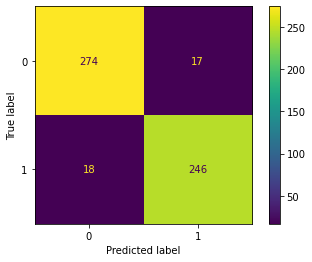

In [16]:
# Decision tree
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=0).fit(X_train_scaled,y_train) 
pred = dt.predict(X_test_scaled)
# Confusion matrix 
cm = metrics.ConfusionMatrixDisplay(confusion_matrix=metrics.confusion_matrix(y_test,pred,labels=dt.classes_),display_labels=dt.classes_)
# Calc metrics
train_a = dt.score(X_train_scaled,y_train)
test_a = dt.score(X_test_scaled,y_test)
prec = metrics.precision_score(y_test,pred,average='micro')
rec = metrics.recall_score(y_test,pred,average='micro')
f1 = metrics.f1_score(y_test,pred,average='micro')
# Add to results
results.append(['DecisionTree',train_a,test_a,prec,rec,f1])
# Print metrics 
print('Testing accuracy: ', train_a)
print('Training accuracy: ', test_a)
print('Precision: ', prec)
print('Recall: ', rec)
print('F1-Score: ', f1)
# Plot confusion matrix
cm.plot()

Testing accuracy:  0.9993990384615384
Training accuracy:  0.9477477477477477
Precision:  0.9477477477477477
Recall:  0.9477477477477477
F1-Score:  0.9477477477477477


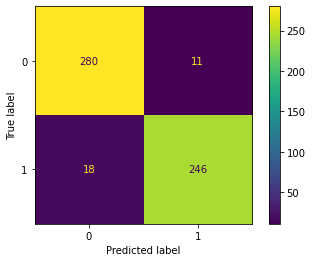

In [17]:
# Random forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=0).fit(X_train_scaled,y_train) 
pred = rf.predict(X_test_scaled)
# Confusion matrix 
cm = metrics.ConfusionMatrixDisplay(confusion_matrix=metrics.confusion_matrix(y_test,pred,labels=rf.classes_),display_labels=rf.classes_)
# Calc metrics
train_a = rf.score(X_train_scaled,y_train)
test_a = rf.score(X_test_scaled,y_test)
prec = metrics.precision_score(y_test,pred,average='micro')
rec = metrics.recall_score(y_test,pred,average='micro')
f1 = metrics.f1_score(y_test,pred,average='micro')
# Add to results
results.append(['RandomForest',train_a,test_a,prec,rec,f1])
# Print metrics 
print('Testing accuracy: ', train_a)
print('Training accuracy: ', test_a)
print('Precision: ', prec)
print('Recall: ', rec)
print('F1-Score: ', f1)
# Plot confusion matrix
cm.plot()

Testing accuracy:  0.5925480769230769
Training accuracy:  0.5405405405405406
Precision:  0.5405405405405406
Recall:  0.5405405405405406
F1-Score:  0.5405405405405406


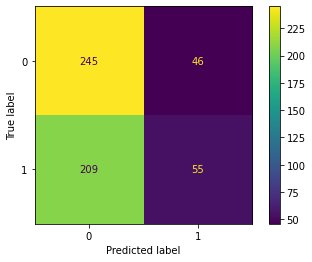

In [19]:
# svm rbf
from sklearn.svm import SVC
rf = SVC(kernel='rbf', C=1.0,random_state=0).fit(X_train_scaled,y_train) 
pred = rf.predict(X_test_scaled)
# Confusion matrix 
cm = metrics.ConfusionMatrixDisplay(confusion_matrix=metrics.confusion_matrix(y_test,pred,labels=rf.classes_),display_labels=rf.classes_)
# Calc metrics
train_a = rf.score(X_train_scaled,y_train)
test_a = rf.score(X_test_scaled,y_test)
prec = metrics.precision_score(y_test,pred,average='micro')
rec = metrics.recall_score(y_test,pred,average='micro')
f1 = metrics.f1_score(y_test,pred,average='micro')
# Add to results
results.append(['svm-rbf kernal',train_a,test_a,prec,rec,f1])
# Print metrics 
print('Testing accuracy: ', train_a)
print('Training accuracy: ', test_a)
print('Precision: ', prec)
print('Recall: ', rec)
print('F1-Score: ', f1)
# Plot confusion matrix
cm.plot()

Testing accuracy:  0.5691105769230769
Training accuracy:  0.5243243243243243
Precision:  0.5243243243243243
Recall:  0.5243243243243243
F1-Score:  0.5243243243243243


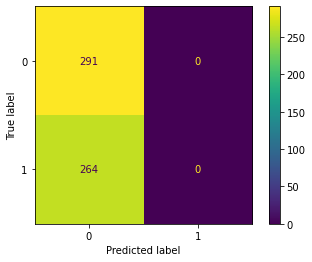

In [21]:
# svm leaner
from sklearn.svm import SVC
rf = SVC(kernel='linear', C=1.0,random_state=0).fit(X_train_scaled,y_train) 
pred = rf.predict(X_test_scaled)
# Confusion matrix 
cm = metrics.ConfusionMatrixDisplay(confusion_matrix=metrics.confusion_matrix(y_test,pred,labels=rf.classes_),display_labels=rf.classes_)
# Calc metrics
train_a = rf.score(X_train_scaled,y_train)
test_a = rf.score(X_test_scaled,y_test)
prec = metrics.precision_score(y_test,pred,average='micro')
rec = metrics.recall_score(y_test,pred,average='micro')
f1 = metrics.f1_score(y_test,pred,average='micro')
# Add to results
results.append(['svm-linear kernal',train_a,test_a,prec,rec,f1])
# Print metrics 
print('Testing accuracy: ', train_a)
print('Training accuracy: ', test_a)
print('Precision: ', prec)
print('Recall: ', rec)
print('F1-Score: ', f1)
# Plot confusion matrix
cm.plot()

In [22]:
# Compile the results into a dataframe for easy comparison, sort by highest accuracy
df_results = pd.DataFrame(results, columns=result_cols)
df_results = df_results.sort_values(['Testing Accuracy','Training Accuracy'],ascending=False)
df_results

,Model Name,Training Accuracy,Testing Accuracy,Precision,Recall,F1-Score
3,RandomForest,0.999399,0.947748,0.947748,0.947748,0.947748
2,DecisionTree,1.000000,0.936937,0.936937,0.936937,0.936937
0,LogisticRegression,0.594351,0.549550,0.549550,0.549550,0.549550
4,svm-rbf kernal,0.592548,0.540541,0.540541,0.540541,0.540541
5,svm-linear kernal,0.569111,0.524324,0.524324,0.524324,0.524324
1,k-NN,0.721154,0.497297,0.497297,0.497297,0.497297


The analysis shows that random forest classifer and decision tree classifier shows highest accuracy and knn shows least accuracy from model comparisons.